# Who wins the Big Game?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
train_raw=pd.read_csv('Dataset/train.csv',index_col='ID')
X_test=pd.read_csv('Dataset/test.csv',index_col='ID')
test_raw=pd.read_csv('Dataset/test.csv')
train_raw

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level
ID,,,,,,,,,
6056,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate
9702,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate
1745,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate
4757,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate
7242,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate
...,...,...,...,...,...,...,...,...,...
5568,0,1,14,2,Less_Than_Four_Billion,Aggressive_Defense,26,three,Intermediate
8301,1,2,14,3,Less_Than_Four_Billion,Aggressive_Defense,27,seven,Intermediate
2532,1,1,14,2,Less_Than_Four_Billion,Aggressive_Defense,27,five,Intermediate


### Exploratory Data Analysis

In [3]:
train_raw.describe()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,0.500769,1.829077,13.926308,2.154615,26.346615
std,0.500038,0.582494,1.135781,0.598970,0.573036
min,0.000000,0.000000,10.000000,0.000000,24.000000
25%,0.000000,1.000000,13.000000,2.000000,26.000000
50%,1.000000,2.000000,14.000000,2.000000,26.000000
75%,1.000000,2.000000,15.000000,3.000000,27.000000
max,1.000000,4.000000,18.000000,4.000000,28.000000


In [4]:
print(train_raw.shape)
print(X_test.shape)

(6500, 9)
(3500, 8)


In [5]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 6056 to 7238
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Won_Championship                   6500 non-null   int64 
 1   Previous_SB_Wins                   6500 non-null   int64 
 2   Number_Of_Wins_This_Season         6500 non-null   int64 
 3   Number_Of_First_Round_Draft_Picks  6500 non-null   int64 
 4   Team_Value                         6500 non-null   object
 5   Playing_Style                      6500 non-null   object
 6   Average_Player_Age                 6500 non-null   int64 
 7   Number_Of_Injured_Players          6500 non-null   object
 8   Coach_Experience_Level             6500 non-null   object
dtypes: int64(5), object(4)
memory usage: 507.8+ KB


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1 to 10000
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Previous_SB_Wins                   3500 non-null   int64 
 1   Number_Of_Wins_This_Season         3500 non-null   int64 
 2   Number_Of_First_Round_Draft_Picks  3500 non-null   int64 
 3   Team_Value                         3500 non-null   object
 4   Playing_Style                      3500 non-null   object
 5   Average_Player_Age                 3500 non-null   int64 
 6   Number_Of_Injured_Players          3500 non-null   object
 7   Coach_Experience_Level             3500 non-null   object
dtypes: int64(4), object(4)
memory usage: 246.1+ KB


#### Understanding the basic Feature set. 
    -- Numerical Features :Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age.
    -- Categorical Features :Team_Value,Playing_Style,Number_Of_Injured_Players,Coach_Experience_Level.

### Check the distribution of output


1    3255
0    3245
Name: Won_Championship, dtype: int64


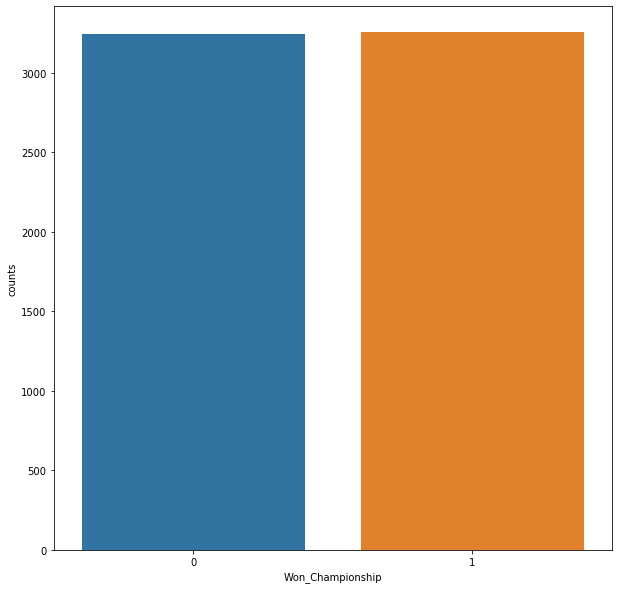

In [7]:
target_count=train_raw['Won_Championship'].value_counts()
print(target_count)
plt.figure(figsize=(10,10))
sns.barplot(target_count.index,target_count.values)
plt.xlabel('Won_Championship',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

### Observation
    -- It is a balanced Data set.  

### Analysis on --  Previous_SB_Wins

count    6500.000000
mean        1.829077
std         0.582494
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Previous_SB_Wins, dtype: float64


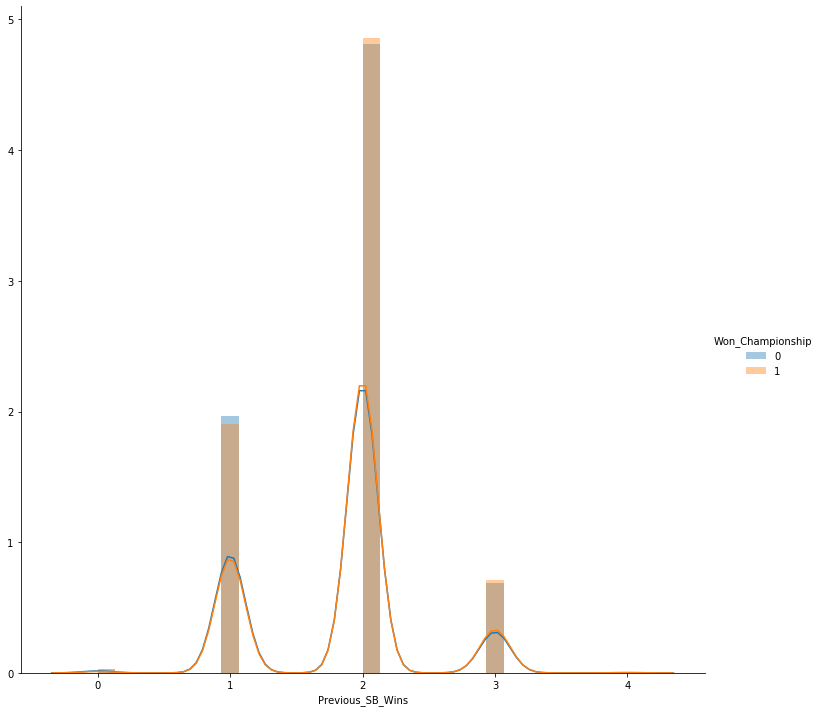

In [8]:
print(train_raw['Previous_SB_Wins'].describe())
sns.FacetGrid(train_raw, hue="Won_Championship", size=10) \
   .map(sns.distplot, "Previous_SB_Wins") \
   .add_legend();
plt.show();

### Analysis on --  Number_Of_Wins_This_Season

count    6500.000000
mean       13.926308
std         1.135781
min        10.000000
25%        13.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Number_Of_Wins_This_Season, dtype: float64


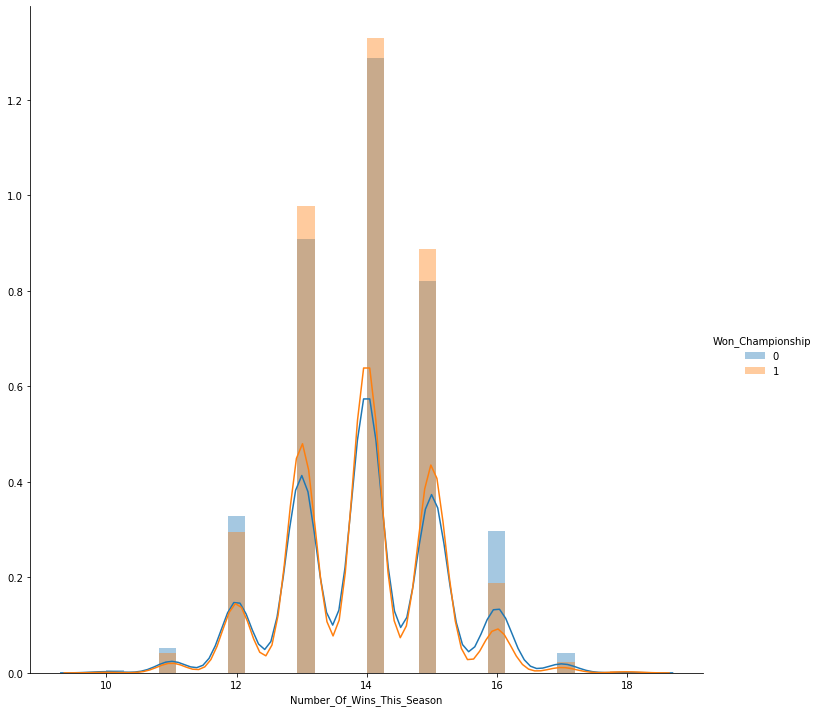

In [9]:
print(train_raw['Number_Of_Wins_This_Season'].describe())
sns.FacetGrid(train_raw, hue="Won_Championship", size=10) \
   .map(sns.distplot, "Number_Of_Wins_This_Season") \
   .add_legend();
plt.show();

## Analysis on Number_Of_First_Round_Draft_Picks

count    6500.000000
mean        2.154615
std         0.598970
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Number_Of_First_Round_Draft_Picks, dtype: float64


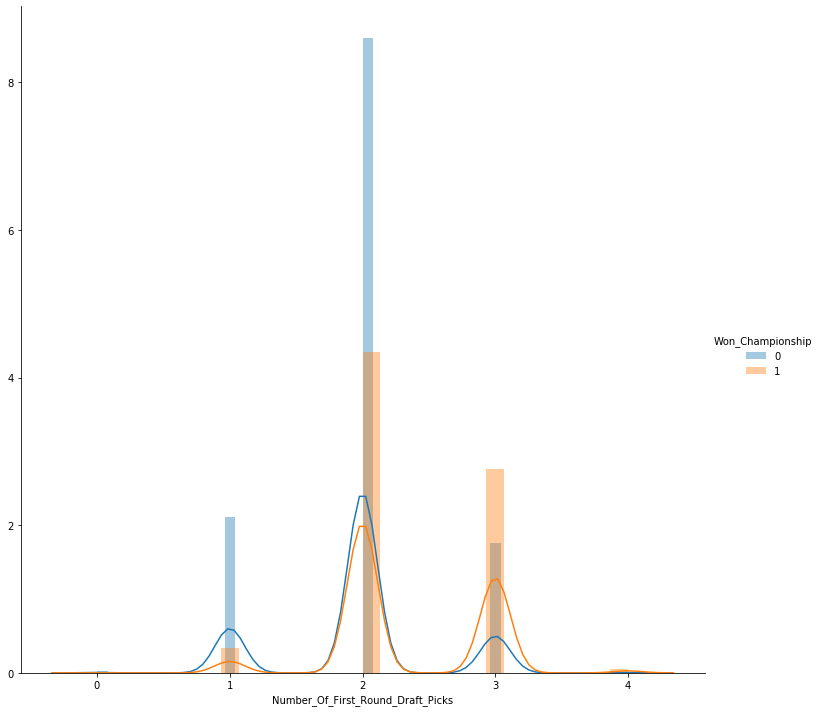

In [10]:
print(train_raw['Number_Of_First_Round_Draft_Picks'].describe())
sns.FacetGrid(train_raw, hue="Won_Championship", size=10) \
   .map(sns.distplot, "Number_Of_First_Round_Draft_Picks") \
   .add_legend();
plt.show();

## Analysis on Average_Player_Age

count    6500.000000
mean       26.346615
std         0.573036
min        24.000000
25%        26.000000
50%        26.000000
75%        27.000000
max        28.000000
Name: Average_Player_Age, dtype: float64


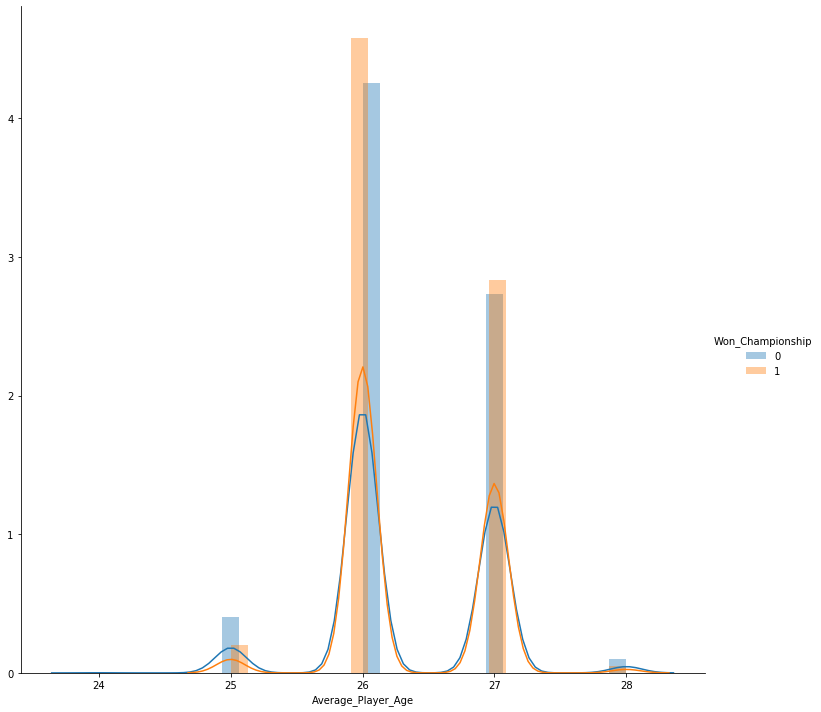

In [11]:
print(train_raw['Average_Player_Age'].describe())
sns.FacetGrid(train_raw, hue="Won_Championship", size=10) \
   .map(sns.distplot, "Average_Player_Age") \
   .add_legend();
plt.show();

## Analysis on Team_Value

Less_Than_Four_Billion     5130
Above_Four_Billion          717
Less_Than_Three_Billion     653
Name: Team_Value, dtype: int64


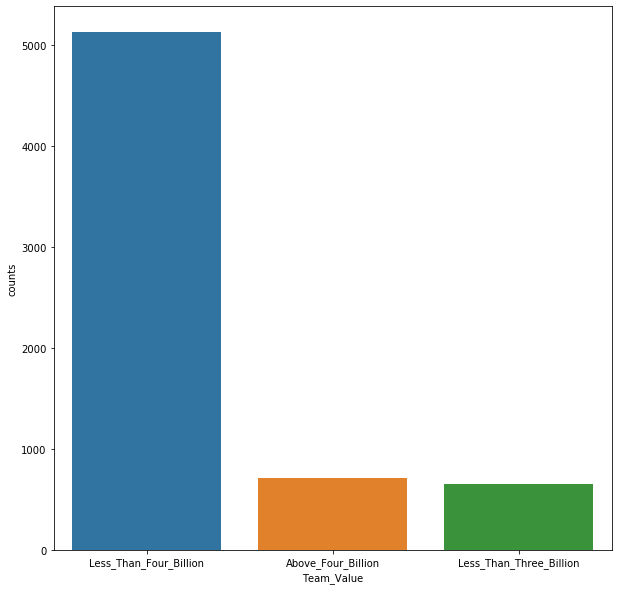

In [12]:
target_count=train_raw['Team_Value'].value_counts()
print(target_count)
plt.figure(figsize=(10,10))
sns.barplot(target_count.index,target_count.values)
plt.xlabel('Team_Value',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

In [13]:
test=pd.crosstab(train_raw['Team_Value'], train_raw['Won_Championship'])
test

Won_Championship,0,1
Team_Value,,
Above_Four_Billion,369,348
Less_Than_Four_Billion,2545,2585
Less_Than_Three_Billion,331,322


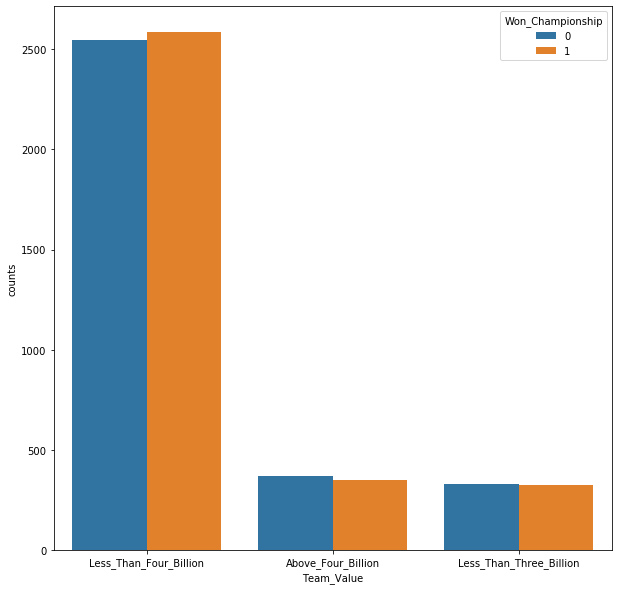

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_raw,x='Team_Value',hue='Won_Championship')
plt.xlabel('Team_Value',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

## Analysis on Playing_Style

Aggressive_Defense    3204
Balanced              2908
Aggressive_Offense     223
Relaxed                165
Name: Playing_Style, dtype: int64


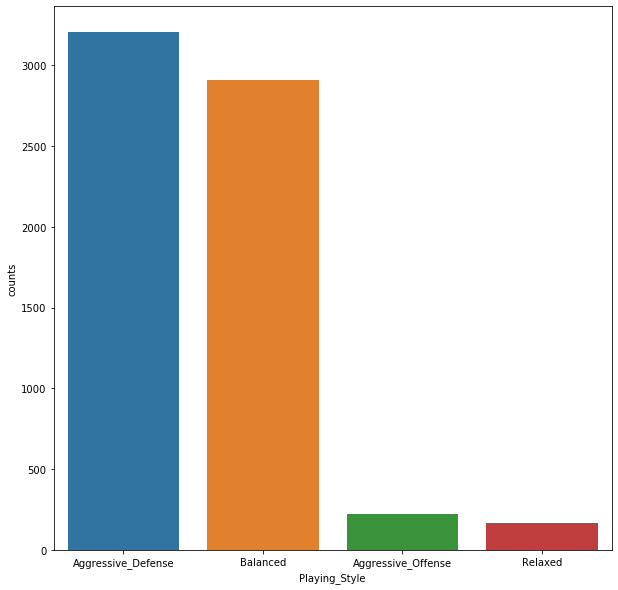

In [15]:
target_count=train_raw['Playing_Style'].value_counts()
print(target_count)
plt.figure(figsize=(10,10))
sns.barplot(target_count.index,target_count.values)
plt.xlabel('Playing_Style',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

In [16]:
test=pd.crosstab(train_raw['Playing_Style'], train_raw['Won_Championship'])
test

Won_Championship,0,1
Playing_Style,,
Aggressive_Defense,1602,1602
Aggressive_Offense,117,106
Balanced,1444,1464
Relaxed,82,83


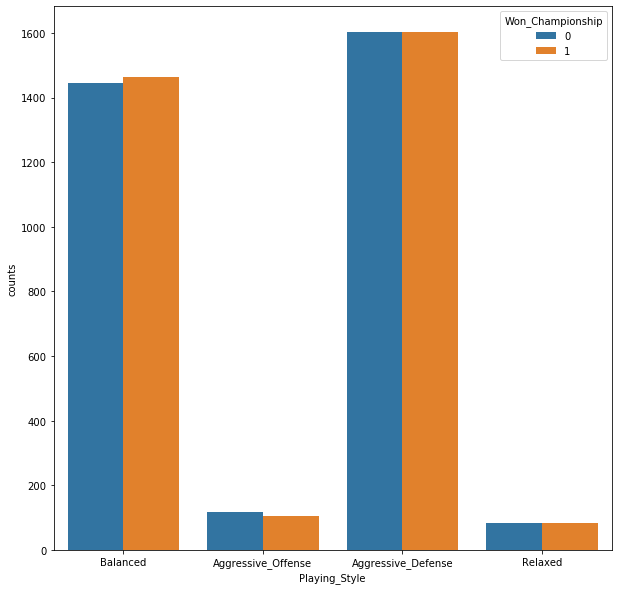

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_raw,x='Playing_Style',hue='Won_Championship')
plt.xlabel('Playing_Style',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

## Analysis on Number_Of_Injured_Players

five     1894
six      1799
four     1069
seven     972
three     343
eight     289
two        78
nine       44
one        10
ten         2
Name: Number_Of_Injured_Players, dtype: int64


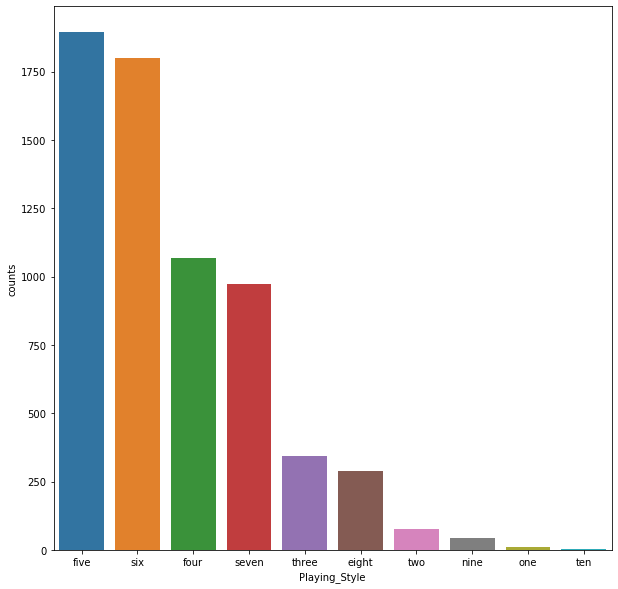

In [18]:
target_count=train_raw['Number_Of_Injured_Players'].value_counts()
print(target_count)
plt.figure(figsize=(10,10))
sns.barplot(target_count.index,target_count.values)
plt.xlabel('Playing_Style',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

In [19]:
test=pd.crosstab(train_raw['Number_Of_Injured_Players'], train_raw['Won_Championship'])
test

Won_Championship,0,1
Number_Of_Injured_Players,,
eight,176,113
five,839,1055
four,580,489
nine,38,6
one,8,2
seven,498,474
six,833,966
ten,1,1
three,214,129


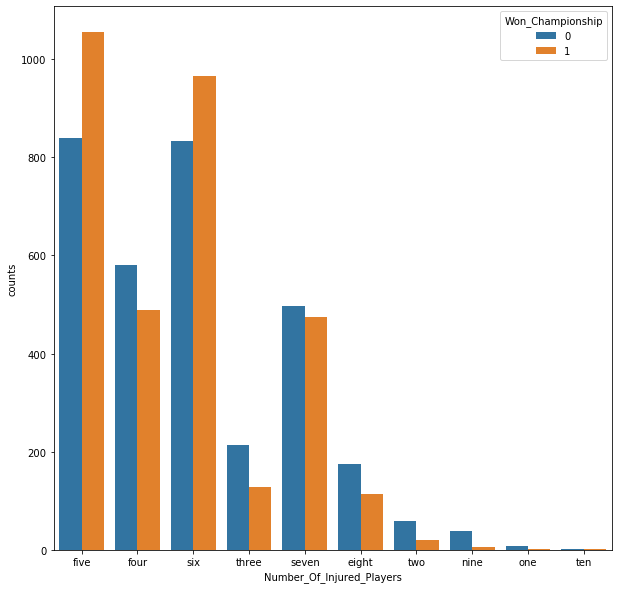

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_raw,x='Number_Of_Injured_Players',hue='Won_Championship')
plt.xlabel('Number_Of_Injured_Players',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

### Analysis on Coach_Experience_Level

Intermediate    5154
Beginner         674
Advanced         672
Name: Coach_Experience_Level, dtype: int64


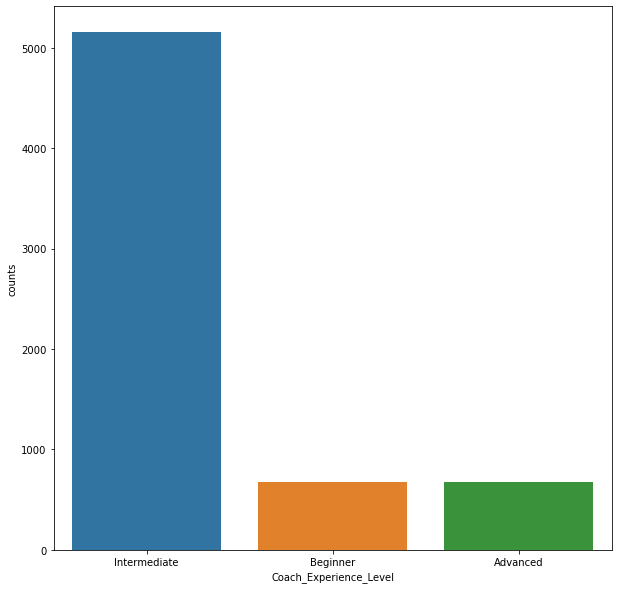

In [21]:
target_count=train_raw['Coach_Experience_Level'].value_counts()
print(target_count)
plt.figure(figsize=(10,10))
sns.barplot(target_count.index,target_count.values)
plt.xlabel('Coach_Experience_Level',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

In [22]:
test=pd.crosstab(train_raw['Coach_Experience_Level'], train_raw['Won_Championship'])
test

Won_Championship,0,1
Coach_Experience_Level,,
Advanced,76,596
Beginner,542,132
Intermediate,2627,2527


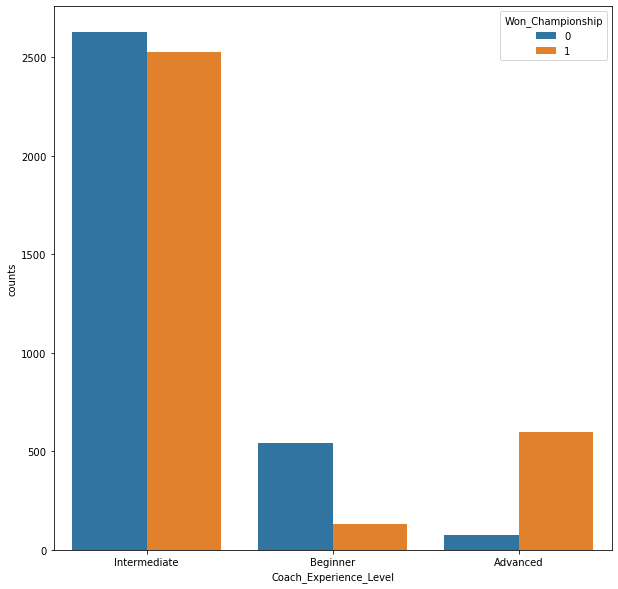

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_raw,x='Coach_Experience_Level',hue='Won_Championship')
plt.xlabel('Coach_Experience_Level',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

### Observation:
        -- The experience level of coach matter a lot.

## Checking for missing values

In [24]:
print(train_raw[train_raw.isnull().any(axis=1)].shape)
print(X_test[X_test.isnull().any(axis=1)].shape)

(0, 9)
(0, 8)


## Declare the dependant and Independent Variables 

In [25]:
y = train_raw['Won_Championship'].values
X = train_raw.drop(['Won_Championship'], axis=1)
#X_test =test_raw.drop('Accident_ID',axis=1)
print(X.shape)
print(y.shape)

(6500, 8)
(6500,)


## Split data Into train and Validation



In [26]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train, y_val=train_test_split(X, y, test_size=0.1, random_state=0)


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)


(5850, 8)
(650, 8)
(3500, 8)
(5850,)
(650,)


### Lets vectorize the categorical features

In [27]:
X_train.dtypes

Previous_SB_Wins                      int64
Number_Of_Wins_This_Season            int64
Number_Of_First_Round_Draft_Picks     int64
Team_Value                           object
Playing_Style                        object
Average_Player_Age                    int64
Number_Of_Injured_Players            object
Coach_Experience_Level               object
dtype: object

In [28]:
X_test.dtypes

Previous_SB_Wins                      int64
Number_Of_Wins_This_Season            int64
Number_Of_First_Round_Draft_Picks     int64
Team_Value                           object
Playing_Style                        object
Average_Player_Age                    int64
Number_Of_Injured_Players            object
Coach_Experience_Level               object
dtype: object

### Standardize the numerical features

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer


for column in X_train.columns:
    if (X_train[column].dtype =='float64') or (X_train[column].dtype =='int64'):
        print('numeric - ' + column)
        scaler = StandardScaler()
        scaler.fit(X_train[column].values.reshape(-1,1))

        # we use the fitted CountVectorizer to convert the text to vector
        train_column=scaler.transform(X_train[column].values.reshape(-1,1))
        val_column=scaler.transform(X_val[column].values.reshape(-1,1))
        test_column=scaler.transform(X_test[column].values.reshape(-1,1))
        
        X_train[column]= train_column
        X_val[column]= val_column
        X_test[column]=test_column
    
  
        
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

numeric - Previous_SB_Wins
numeric - Number_Of_Wins_This_Season
numeric - Number_Of_First_Round_Draft_Picks
numeric - Average_Player_Age
(5850, 8)
(650, 8)
(3500, 8)


### Vectorize all the categorical features

In [30]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['Team_Value'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_Team_Value=vectorizer.transform(X_train['Team_Value'].values)
X_test_Team_Value=vectorizer.transform(X_test['Team_Value'].values)
X_val_Team_Value=vectorizer.transform(X_val['Team_Value'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_Team_Value.shape)


['Above_Four_Billion', 'Less_Than_Four_Billion', 'Less_Than_Three_Billion']
Shape of matrix after one hot encodig  (5850, 3)


In [31]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['Playing_Style'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_Playing_Style=vectorizer.transform(X_train['Playing_Style'].values)
X_test_Playing_Style=vectorizer.transform(X_test['Playing_Style'].values)
X_val_Playing_Style=vectorizer.transform(X_val['Playing_Style'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_Playing_Style.shape)


['Aggressive_Defense', 'Aggressive_Offense', 'Balanced', 'Relaxed']
Shape of matrix after one hot encodig  (5850, 4)


In [32]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['Number_Of_Injured_Players'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_Number_Of_Injured_Players=vectorizer.transform(X_train['Number_Of_Injured_Players'].values)
X_test_Number_Of_Injured_Players=vectorizer.transform(X_test['Number_Of_Injured_Players'].values)
X_val_Number_Of_Injured_Players=vectorizer.transform(X_val['Number_Of_Injured_Players'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_Number_Of_Injured_Players.shape)



['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'ten', 'three', 'two']
Shape of matrix after one hot encodig  (5850, 10)


In [33]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['Coach_Experience_Level'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_Coach_Experience_Level=vectorizer.transform(X_train['Coach_Experience_Level'].values)
X_test_Coach_Experience_Level=vectorizer.transform(X_test['Coach_Experience_Level'].values)
X_val_Coach_Experience_Level=vectorizer.transform(X_val['Coach_Experience_Level'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_Coach_Experience_Level.shape)


['Advanced', 'Beginner', 'Intermediate']
Shape of matrix after one hot encodig  (5850, 3)


In [34]:
X_train

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level
ID,,,,,,,,
9237,0.294378,0.069391,-1.930774,Less_Than_Three_Billion,Aggressive_Defense,1.140218,four,Beginner
3725,0.294378,0.069391,-0.256444,Less_Than_Three_Billion,Balanced,-0.610510,seven,Intermediate
3802,0.294378,0.949949,1.417885,Less_Than_Four_Billion,Balanced,-0.610510,six,Intermediate
9321,0.294378,-1.691724,-1.930774,Less_Than_Four_Billion,Aggressive_Defense,1.140218,three,Intermediate
2214,0.294378,-1.691724,-0.256444,Less_Than_Four_Billion,Balanced,-0.610510,five,Intermediate
...,...,...,...,...,...,...,...,...
8335,-1.419167,0.949949,1.417885,Above_Four_Billion,Aggressive_Defense,-0.610510,seven,Intermediate
8240,-1.419167,-2.572282,-1.930774,Less_Than_Four_Billion,Aggressive_Offense,-0.610510,nine,Beginner
9784,0.294378,-1.691724,-1.930774,Less_Than_Four_Billion,Balanced,1.140218,seven,Intermediate


### Merging all the above features

In [35]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train = hstack((X_train[['Previous_SB_Wins','Number_Of_Wins_This_Season','Number_Of_First_Round_Draft_Picks','Average_Player_Age']],X_train_Team_Value,X_train_Playing_Style,X_train_Number_Of_Injured_Players,X_train_Coach_Experience_Level)).toarray()


X_test = hstack((X_test[['Previous_SB_Wins','Number_Of_Wins_This_Season','Number_Of_First_Round_Draft_Picks','Average_Player_Age']],X_test_Team_Value,X_test_Playing_Style,X_test_Number_Of_Injured_Players,X_test_Coach_Experience_Level)).toarray()


X_val = hstack((X_val[['Previous_SB_Wins','Number_Of_Wins_This_Season','Number_Of_First_Round_Draft_Picks','Average_Player_Age']],X_val_Team_Value,X_val_Playing_Style,X_val_Number_Of_Injured_Players,X_val_Coach_Experience_Level)).toarray()

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(5850, 24)
(3500, 24)
(650, 24)


## applying t-SNE
    -- checking for data seperatabilty in 2d space

In [36]:
from sklearn.manifold import TSNE

labels=y_train
model =TSNE(n_components=2, random_state=0,perplexity=30)
tsne_data = model.fit_transform(X_train)
temp=tsne_data

In [37]:
labels=labels[:,np.newaxis]
print(tsne_data.shape)
print(labels.shape)

(5850, 2)
(5850, 1)


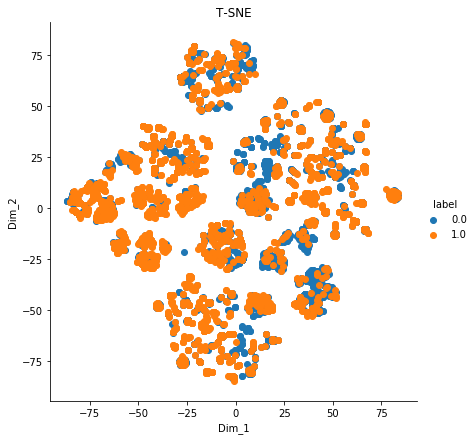

In [38]:
#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE")
plt.show()

## Applying Logistic Regression with HyperParameter Tuning

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

summary=[]

#hyperparameters
C=[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100,200,300,400,500,600,700,800,900,1000,10000]
penalty=['l1','l2','elasticnet','none']
dual=[True,False]
fit_intercept=[True,False]
class_weight=['balanced',None]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty,dual=dual,fit_intercept=fit_intercept,class_weight=class_weight,solver=solver)

# create instance of model
lr=LogisticRegression()

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(lr, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# fit the data
best_lr=clf.fit(X_train,y_train)

# predict the output
y_pred=best_lr.predict(X_val)

#evaluate f1 score 
f1=f1_score(y_val,y_pred,average='binary')

#add into list to view in table 
summary.append(['logistic Regression',best_lr.best_estimator_.get_params(),f1])

## Applying SVM Regression with HyperParameter Tuning

In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV


C=[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100,200,300,400,500,600,700,800,900,1000,10000]
penalty=['l1','l2','elasticnet']
fit_intercept=[True,False]
shuffle=[True,False]
class_weight=['balanced',None]


# Create hyperparameter options
hyperparameters = dict(alpha=C, penalty=penalty,fit_intercept=fit_intercept,shuffle=shuffle,class_weight=class_weight)    

# create instance of model
sgd=SGDClassifier(loss='hinge')

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(sgd, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# fit the data
best_sgd=clf.fit(X_train,y_train)

# predict the output
y_pred=best_sgd.predict(X_val)

#evaluate f1 score 
f1=f1_score(y_val,y_pred,average='binary')

#add into list to view in table 
summary.append(['SVM',best_sgd.best_estimator_.get_params(),f1])

## Applying KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV


n_neighbors=range(1,100,5)
weights=['uniform','distance']
algorithm=['auto', 'ball_tree', 'kd_tree','brute']


# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights,algorithm=algorithm)    

# create instance of model
knn=KNeighborsClassifier()

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(knn, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# fit the data
best_knn=clf.fit(X_train,y_train)

# predict the output
y_pred=best_knn.predict(X_val)

#evaluate f1 score 
f1=f1_score(y_val,y_pred,average='binary')

#add into list to view in table 
summary.append(['knn',best_knn.best_estimator_.get_params(),f1])

## Applying Descision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

min_samples_split=range(2,100,5)
min_samples_leaf=range(1,100,5)
criterion = ['gini', 'entropy']
splitter=['best', 'random']
max_features=['auto', 'sqrt', 'log2']
class_weight=['balanced',None]





# Create hyperparameter options
hyperparameters = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,criterion=criterion,splitter=splitter,max_features=max_features,class_weight=class_weight)    

# create instance of model
DT=DecisionTreeClassifier()

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(DT, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# fit the data
best_dt=clf.fit(X_train,y_train)

# predict the output
y_pred=best_dt.predict(X_val)

#evaluate f1 score 
f1=f1_score(y_val,y_pred,average='binary')

#add into list to view in table 
summary.append(['DT',best_dt.best_estimator_.get_params(),f1])

## Applying Random Forest  Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

min_samples_split=range(2,100,5)
min_samples_leaf=range(1,100,5)
criterion = ['gini', 'entropy']
n_estimators=range(1,1000,25)
bootstrap=[True,False]
class_weight=['balanced',None]





# Create hyperparameter options
hyperparameters = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,criterion=criterion,
                       n_estimators=n_estimators,bootstrap=bootstrap,class_weight=class_weight)    

# create instance of model
RF=RandomForestClassifier()

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(RF, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# fit the data
best_rf=clf.fit(X_train,y_train)

# predict the output
y_pred=best_rf.predict(X_val)

#evaluate f1 score 
f1=f1_score(y_val,y_pred,average='binary')

#add into list to view in table 
summary.append(['RF',best_rf.best_estimator_.get_params(),f1])

## Applying Gradient boosted Descision Tree Model



In [44]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

max_depth=range(2,100,5)
learning_rate =np.arange(0,1,0.1)
n_estimators=range(1,1000,25)
min_child_weight = [ 1, 3, 5, 7 ]
gamma  = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ]






# Create hyperparameter options
hyperparameters = dict(max_depth=max_depth, learning_rate=learning_rate,n_estimators=n_estimators,min_child_weight=min_child_weight,
                      gamma=gamma,colsample_bytree=colsample_bytree)    

# create instance of model
GBDT=XGBClassifier()

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(GBDT, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# fit the data
best_gb=clf.fit(X_train,y_train)

# predict the output
y_pred=best_gb.predict(X_val)

#evaluate f1 score 
f1=f1_score(y_val,y_pred,average='binary')

#add into list to view in table 
summary.append(['XGDT',best_gb.best_estimator_.get_params(),f1])

## Applying a Neural Network 

In [45]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [46]:
model_1=Sequential()

model_1.add(Dense(output_dim=128,input_dim=X_train.shape[1],activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))


model_1.add(Dense(output_dim=256,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim=512,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim=32,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim=1,activation='sigmoid'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [47]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [48]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',f1_m])

history_1=model_1.fit(X_train,y_train,batch_size=10 ,epochs=20,verbose=1,validation_data=(X_val,y_val))

Train on 5850 samples, validate on 650 samples
Epoch 1/20
5850/5850 [==============================] - 4s 638us/step - loss: 0.7944 - accuracy: 0.5800 - f1_m: 0.5629 - val_loss: 0.5755 - val_accuracy: 0.7200 - val_f1_m: 0.6863
Epoch 2/20
5850/5850 [==============================] - 3s 431us/step - loss: 0.6562 - accuracy: 0.6279 - f1_m: 0.6118 - val_loss: 0.5691 - val_accuracy: 0.7200 - val_f1_m: 0.6890
Epoch 3/20
5850/5850 [==============================] - 2s 389us/step - loss: 0.6132 - accuracy: 0.6579 - f1_m: 0.6387 - val_loss: 0.5644 - val_accuracy: 0.7231 - val_f1_m: 0.7037
Epoch 4/20
5850/5850 [==============================] - 2s 390us/step - loss: 0.5899 - accuracy: 0.6897 - f1_m: 0.6753 - val_loss: 0.5441 - val_accuracy: 0.7292 - val_f1_m: 0.7025
Epoch 5/20
5850/5850 [==============================] - 2s 391us/step - loss: 0.5811 - accuracy: 0.6981 - f1_m: 0.6887 - val_loss: 0.5424 - val_accuracy: 0.7385 - val_f1_m: 0.7094
Epoch 6/20
5850/5850 [==============================]

In [49]:
res=model_1.evaluate(X_val,y_val)
summary.append(['NN','NA',res[2]])
res

650/650 [==============================] - 0s 41us/step


[0.5205689155138455, 0.7461538314819336, 0.7456766963005066]

In [50]:
result=pd.DataFrame(summary,columns=['Model','Best Hyper parameters','f1-score'])
result.to_csv('model_result.csv',index=False)
result

,Model,Best Hyper parameters,f1-score
0,logistic Regression,"{'C': 0.4, 'class_weight': 'balanced', 'dual':...",0.665600
1,SVM,"{'alpha': 0.001, 'average': False, 'class_weig...",0.680062
2,knn,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'm...",0.731411
3,DT,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.719755
4,RF,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.735069
5,XGDT,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.741538
6,NN,NA,0.745677


## saving all the best  models

In [51]:
import pickle
import os
if not os.path.exists('models'):
    os.makedirs('models')

pickle.dump(best_lr,open('models/best_lr.pkl','wb'))
pickle.dump(best_sgd,open('models/best_sgd.pkl','wb'))
pickle.dump(best_knn,open('models/best_knn.pkl','wb'))
pickle.dump(best_dt,open('models/best_dt.pkl','wb'))
pickle.dump(best_rf,open('models/best_rf.pkl','wb'))
pickle.dump(best_gb,open('models/best_gb.pkl','wb'))
model_1.save('models/NN.h5')




In [52]:
import pickle
from keras.models import load_model
# load the model from disk
best_lr = pickle.load(open('models/best_lr.pkl', 'rb'))
best_sgd = pickle.load(open('models/best_sgd.pkl', 'rb'))
best_knn = pickle.load(open('models/best_knn.pkl', 'rb'))
best_dt = pickle.load(open('models/best_dt.pkl', 'rb'))
best_rf = pickle.load(open('models/best_rf.pkl', 'rb'))
best_gb = pickle.load(open('models/best_gb.pkl', 'rb'))
dependencies = {
    'f1_m': f1_m
}

model_1 =load_model('models/NN.h5',custom_objects=dependencies)


## Experiment with Stacking classifiers

In [53]:
from sklearn import model_selection
from mlxtend.classifier import StackingCVClassifier

lr = LogisticRegression()


sclf = StackingCVClassifier(classifiers=[best_lr,best_knn,best_dt,best_rf,best_gb],
                            use_probas=True,
                            meta_classifier=lr,
                            random_state=42)
# fit to training Data
sclf.fit(X_train,y_train)


# predict the output
y_pred=sclf.predict(X_val)

#evaluate f1 score 
f1=f1_score(y_val,y_pred,average='binary')

#add into list to view in table 
summary.append(['stacker','NA',f1])

In [54]:
result=pd.DataFrame(summary,columns=['Model','Best Hyper parameters','f1-score'])
result.to_csv('model_result.csv',index=False)
result

,Model,Best Hyper parameters,f1-score
0,logistic Regression,"{'C': 0.4, 'class_weight': 'balanced', 'dual':...",0.665600
1,SVM,"{'alpha': 0.001, 'average': False, 'class_weig...",0.680062
2,knn,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'm...",0.731411
3,DT,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.719755
4,RF,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.735069
5,XGDT,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.741538
6,NN,NA,0.745677
7,stacker,NA,0.749235


## predict with the best model


In [55]:
y_pred=sclf.predict(X_test)
y_pred
output=pd.DataFrame(test_raw['ID'],columns=['ID'])
output['Won_Championship']=y_pred
output.to_csv('Result.csv',index=False)
output

,ID,Won_Championship
0,1,0
1,5,1
2,6,0
3,7,1
4,9,1
...,...,...
3495,9988,0
3496,9989,1
3497,9996,0
3498,9997,0
